In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [14]:
wf_30_var2060=pd.read_csv("data/WF_L030_W1R_TI_High_VEL020_060_fs1000.csv")
wf_60_cte20=pd.read_csv("data/WF_L060_W1R_TI_High_VEL020_fs1000.csv")
wf_30_cte20=pd.read_csv("data/L030_TI_High_VEL020_fs1000.csv")

WF_Sx=(wf_30_cte20,wf_60_cte20,wf_30_var2060)

WF_Sx[0].tail()

,t [s],az NO FLAT [m/s2],az WITH FLAT [m/s2]
26996,32.666,-9.79136,-9.73745
26997,32.667,-9.79432,-9.81700
26998,32.668,-9.79312,-9.74827
26999,32.669,-9.79609,-9.85328
27000,32.670,-9.79480,-9.84643


In [10]:
n1=pd.read_csv("data/Harmonic_n1_W1R_A001_VEL020_fs1000.csv")
n2=pd.read_csv("data/Harmonic_n2_W1R_A001_VEL020_fs1000.csv")
n3=pd.read_csv("data/Harmonic_n3_W1R_A001_VEL020_fs1000.csv")

n1.tail()

,t [s],az NO FLAT [m/s2],az WITH FLAT [m/s2]
8996,32.666,-9.799010,-9.653204
8997,32.667,-9.803764,-9.650483
8998,32.668,-9.798660,-9.654696
8999,32.669,-9.803680,-9.652433
9000,32.670,-9.816648,-9.695604


### Constant Speed, L=60 mm

In [19]:
t = wf_60_cte20['t [s]'].to_numpy()
az_no_flat = wf_60_cte20['az NO FLAT [m/s2]'].to_numpy()
az_with_flat = wf_60_cte20['az WITH FLAT [m/s2]'].to_numpy()

print('Mean az no flat:',np.mean(az_no_flat))
print('Mean az flat:', np.mean(az_with_flat))

az_no_flat = az_no_flat - np.mean(az_no_flat)
az_with_flat = az_with_flat - np.mean(az_with_flat)

fs=1e3
#fs=1/np.mean(np.diff(t))
print('Sampling freq:',fs,'Hz')
N=len(t)
print('Number of samples:', N)


v=20e3/3600
print('Lineal velocity:',v,'m/s')
r=0.46
print('Radius:',r,'m')
fr=v/(2*np.pi*r)
print('Rotational freq:',fr,'Hz')

print('Initial time:',t[0],'s')

Mean az no flat: -9.809570537387504
Mean az flat: -9.793246153105441
Sampling freq: 1000.0 Hz
Number of samples: 27001
Lineal velocity: 5.555555555555555 m/s
Radius: 0.46 m
Rotational freq: 1.9221611484528422 Hz
Initial time: 5.67 s


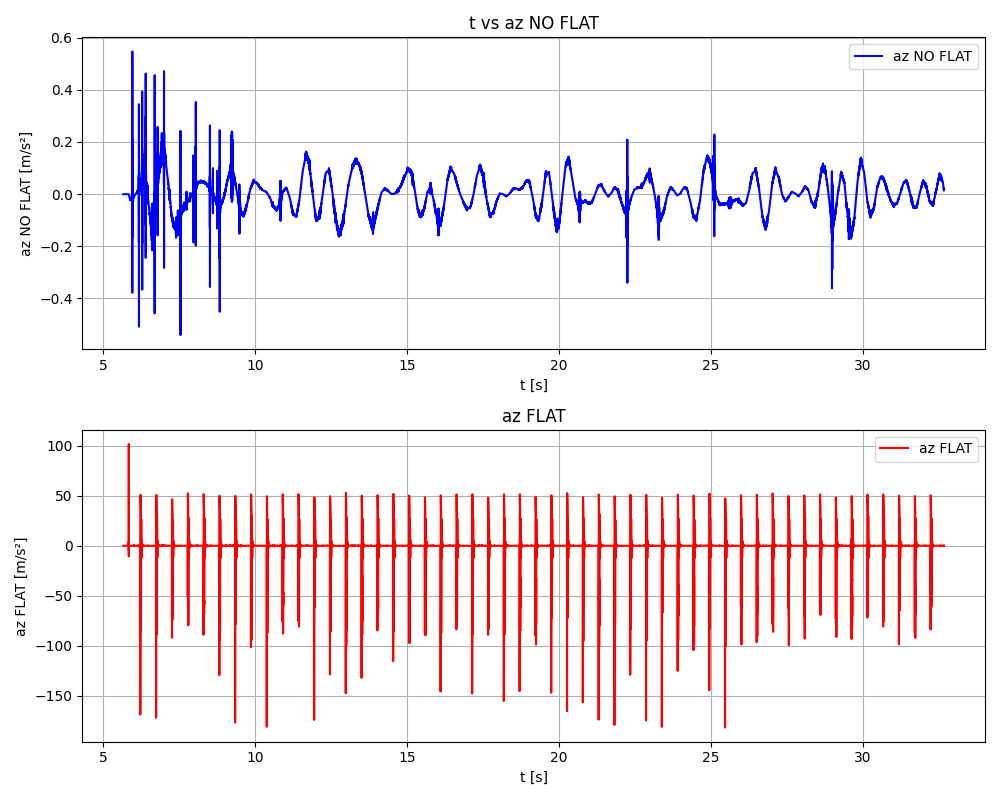

In [20]:
# Crear los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Primer subplot: t vs az_no_flat_array
axs[0].plot(t, az_no_flat, label='az NO FLAT', color='b')
axs[0].set_title('t vs az NO FLAT')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel('az NO FLAT [m/s²]')
axs[0].grid(True)
axs[0].legend()

# Segundo subplot: az_no_flat_array
axs[1].plot(t,az_with_flat, label='az FLAT', color='r')
axs[1].set_title('az FLAT')
axs[1].set_xlabel('t [s]')
axs[1].set_ylabel('az FLAT [m/s²]')
axs[1].grid(True)
axs[1].legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

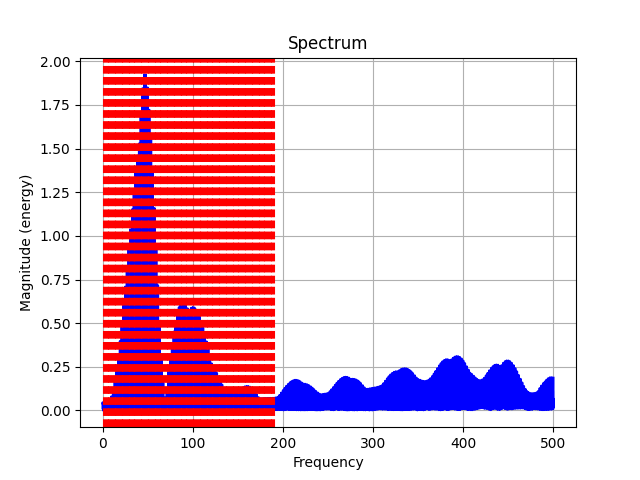

Max freq: 46.14643902077701


In [21]:
plt.close('all')
%matplotlib widget 
plt.title("Spectrum")
spectrum=plt.magnitude_spectrum(az_with_flat, Fs=fs, color='blue')
for i in range(1, 100):
    plt.axvline(x=i*fr, color='red', linestyle='--', label=f'{i}*fr' if i == 1 else None)
plt.grid(True)
plt.show()

print('Max freq:',spectrum[1][np.argmax(spectrum[0])])

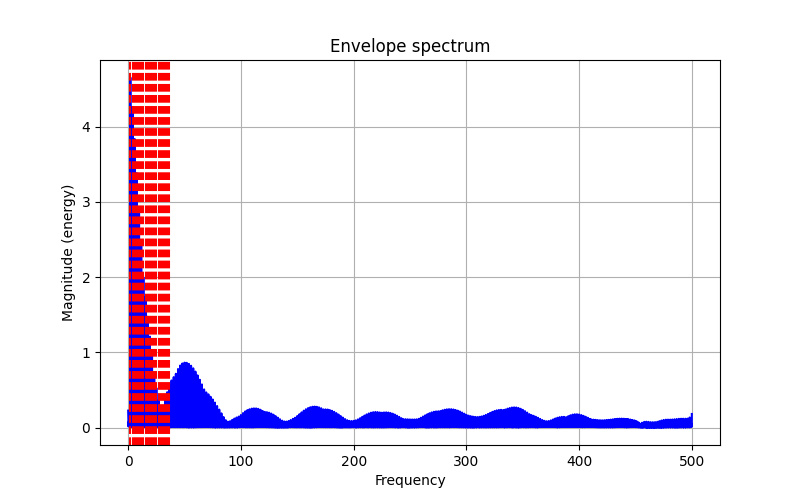

In [29]:
plt.close('all')
Sx_flat_env=np.abs(signal.hilbert(az_with_flat))
%matplotlib widget 
#%matplotlib inline
plt.figure(figsize=(8,5))
plt.title("Envelope spectrum")
spectrum=plt.magnitude_spectrum(Sx_flat_env-np.mean(Sx_flat_env), Fs=fs, color='blue')
for i in range(1, 20):
    plt.axvline(x=i*fr, color='red', linestyle='--', label=f'{i}*fr' if i == 1 else None)
plt.grid(True)
#plt.savefig('prueba_rm.pdf',bbox_inches='tight')
plt.show()

In [38]:
n=np.arange(N)
f_fail=fr*np.ones((N,1))

In [39]:
Λ=10
D_lambda=1/16
K=int(Λ/D_lambda)
Ts=1/fs
λs=np.arange(0,Λ,D_lambda)
print('K:',K)
print(len(f_fail))
print(Ts)

K: 160
27001
0.001


In [40]:
G=np.zeros((K,N),dtype=np.complex128)
for k in range(K):
    G[k,:]=np.exp(-1j*2*np.pi*D_lambda*k*Ts*np.cumsum(f_fail))

G.shape

(160, 27001)

In [41]:
Sx_flat_env=Sx_flat_env-np.mean(Sx_flat_env)
Sx_env_analytic=signal.hilbert(Sx_flat_env)
Sx_env_analytic.shape

(27001,)

In [36]:
X_lambda = (1/N)*np.dot(G, Sx_env_analytic)

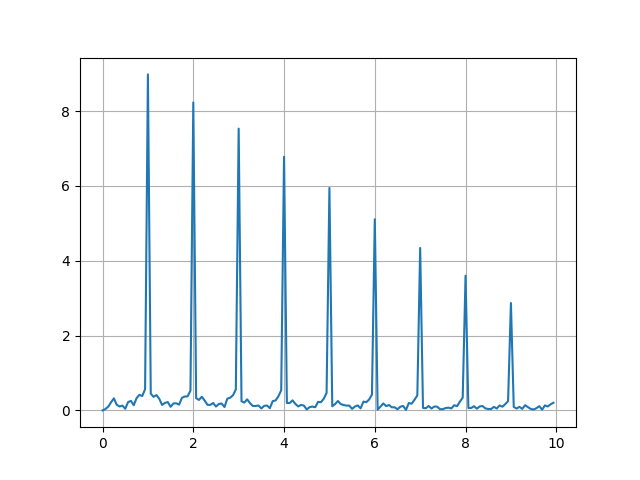

In [42]:
plt.close('all')
%matplotlib widget

plt.plot(λs,np.abs(X_lambda))
plt.grid(True)